In [1]:
import numpy as np                 
import scipy.stats                
import csv                         
import pandas as pd                
import matplotlib.pyplot as plt    
import math
import seaborn as sns
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [2]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv", index_col='PassengerId')
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")

train_data.head(15)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [3]:
test_data.head(15)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [4]:
train_data.describe(include="all") 

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [5]:
test_data.describe(include="all")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


In [6]:
print(train_data.dtypes)

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object


Survived    0    1  Survival Rate
Pclass                           
1          80  136       0.629630
2          97   87       0.472826
3         372  119       0.242363


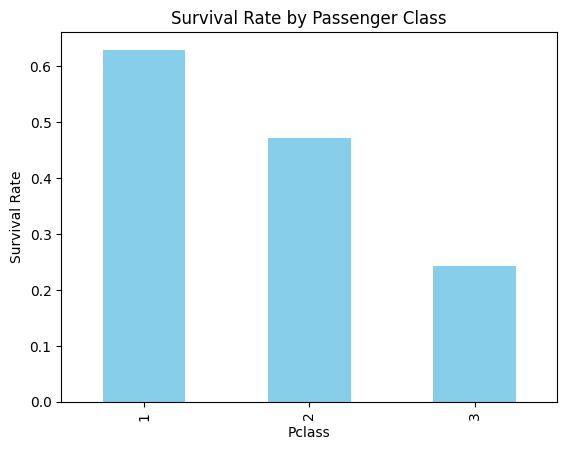

In [7]:
#Visualization: 
pivot_class_survived = train_data.pivot_table(index='Pclass', columns='Survived', aggfunc='size', fill_value=0)

#Survival rate by class
pivot_class_survived['Survival Rate'] = pivot_class_survived[1] / (pivot_class_survived[0] + pivot_class_survived[1])
print(pivot_class_survived)

# Plotting the survival rate by class
pivot_class_survived['Survival Rate'].plot(kind='bar', color='skyblue')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Passenger Class')
plt.show()


In [8]:
train_data[['Survived', 'Sex', 'Pclass']].groupby(['Pclass', 'Sex']).mean()

Survived
Pclass Sex             
1      female  0.968085
       male    0.368852
2      female  0.921053
       male    0.157407
3      female  0.500000
       male    0.135447

In [9]:
contingency_table = pd.crosstab(train_data['Sex'], train_data['Survived'])

# Perform the Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)
# Output the results
print(f"Chi-Square Statistic: {chi2}")
print(f"p-value: {p}")

Chi-Square Statistic: 260.71702016732104
p-value: 1.1973570627755645e-58


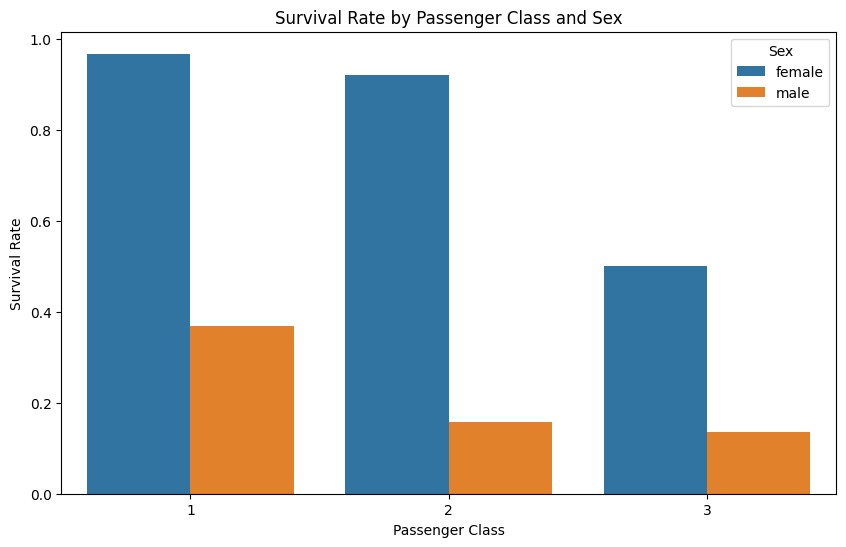

In [10]:
grouped_data = train_data[['Survived', 'Sex', 'Pclass']].groupby(['Pclass', 'Sex']).mean().reset_index()

# Bar graph to visualize the relation
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=grouped_data)

plt.title('Survival Rate by Passenger Class and Sex')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.legend(title='Sex')

# Show the plot
plt.show()

<Figure size 1000x1000 with 0 Axes>

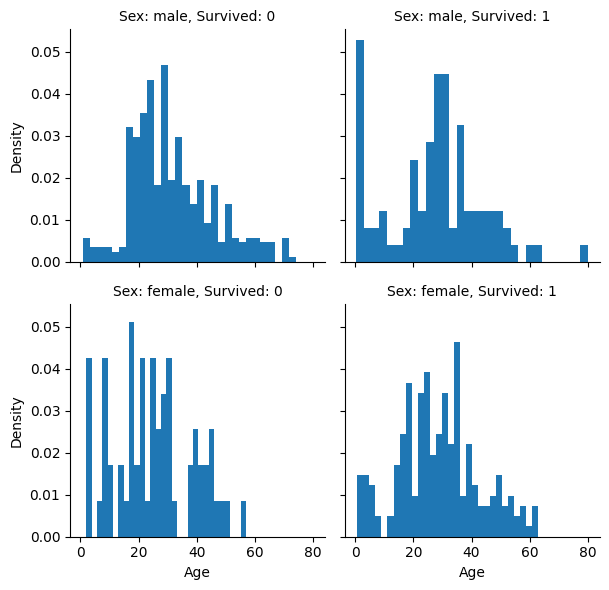

In [11]:
# Assuming 'train_data' is your DataFrame and it includes 'Survived', 'Sex', and 'Age'
plt.figure(figsize=(10, 10))

# Create a FacetGrid with normalized histograms
g = sns.FacetGrid(train_data, row='Sex', col='Survived')
g.map(plt.hist, 'Age', bins=30, density=True)

# Adding labels and titles for clarity
g.set_xlabels('Age')
g.set_ylabels('Density')
g.set_titles('Sex: {row_name}, Survived: {col_name}')

# Display the plot
plt.show()

In [12]:
age_bins = [0, 18, 30, 40, 50, 60, 120]  # Adjust the bins as you see fit
age_labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '60+']

# Create a new column for the age groups
train_data['AgeGroup'] = pd.cut(train_data['Age'], bins=age_bins, labels=age_labels, right=False)

# Create the contingency table
contingency_table = pd.crosstab(train_data['AgeGroup'], train_data['Survived'])

# Apply the Chi-Square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Output the results
print(f"Chi-Square Statistic: {chi2}")
print(f"p-value: {p_value}")

Chi-Square Statistic: 14.76635608177536
p-value: 0.011408734922390685


In [13]:
num_females = train_data['Sex'].value_counts()['female']
num_males = train_data['Sex'].value_counts()['male']

print(f"Number of females: {num_females}")
print(f"Number of males: {num_males}")

Number of females: 314
Number of males: 577


In [14]:
contingency_table = pd.crosstab(train_data['SibSp'], train_data['Survived'])

# Perform the Chi-Square Test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Output the results
print(f"Chi-Square Statistic: {chi2}")
print(f"p-value: {p_value}")

Chi-Square Statistic: 37.2717929152043
p-value: 1.5585810465902147e-06


In [15]:
contingency_table = pd.crosstab(train_data['Parch'], train_data['Survived'])

# Perform the Chi-Square Test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Output the results
print(f"Chi-Square Statistic: {chi2}")
print(f"p-value: {p_value}")

Chi-Square Statistic: 27.925784060236168
p-value: 9.703526421039997e-05


In [16]:
# Define fare bins and labels
fare_bins = [0, 25, 50, 100, 200, np.inf]
fare_labels = ['0-25', '26-50', '51-100', '101-200', '200+']
train_data['FareBin'] = pd.cut(train_data['Fare'], bins=fare_bins, labels=fare_labels)

# Create the contingency table
contingency_table_fare = pd.crosstab(train_data['FareBin'], train_data['Survived'])

# Perform the Chi-Square Test
chi2_fare, p_value_fare, dof_fare, expected_fare = chi2_contingency(contingency_table_fare)
print(f"Chi-Square Statistic for Fare: {chi2_fare}")
print(f"p-value for Fare: {p_value_fare}")

Chi-Square Statistic for Fare: 80.18578483773231
p-value for Fare: 1.590906917104074e-16


/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


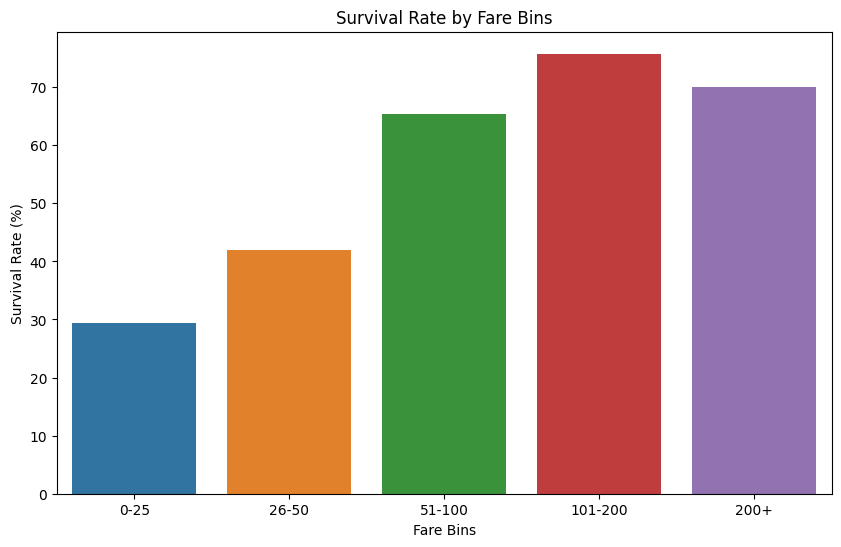

In [17]:
survival_rate_by_fare = (contingency_table_fare[1] / contingency_table_fare.sum(axis=1)) * 100

# Create a bar plot for visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=survival_rate_by_fare.index, y=survival_rate_by_fare.values)
plt.title('Survival Rate by Fare Bins')
plt.xlabel('Fare Bins')
plt.ylabel('Survival Rate (%)')
plt.show()

In [18]:
#Clean the data:
train_data['Sex'] = train_data['Sex'].map({'female': 0, 'male': 1}).astype(int)
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
embarked_dummies = pd.get_dummies(train_data['Embarked'], prefix='Embarked')
train_data = pd.concat([train_data, embarked_dummies], axis=1)
train_data = train_data.drop('Embarked', axis=1)
train_data = train_data.drop(['Ticket', 'Name', 'Cabin'], axis=1)

/tmp/ipykernel_18/1567217381.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(train_data['Age'].median(), inplace=True)


In [19]:
train_data.describe(include="all")

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,AgeGroup,FareBin,Embarked_C,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,714,876,891,891,891
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,5,2,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19-30,0-25,False,False,True
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,271,542,723,814,644
mean,0.383838,2.308642,0.647587,29.361582,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN


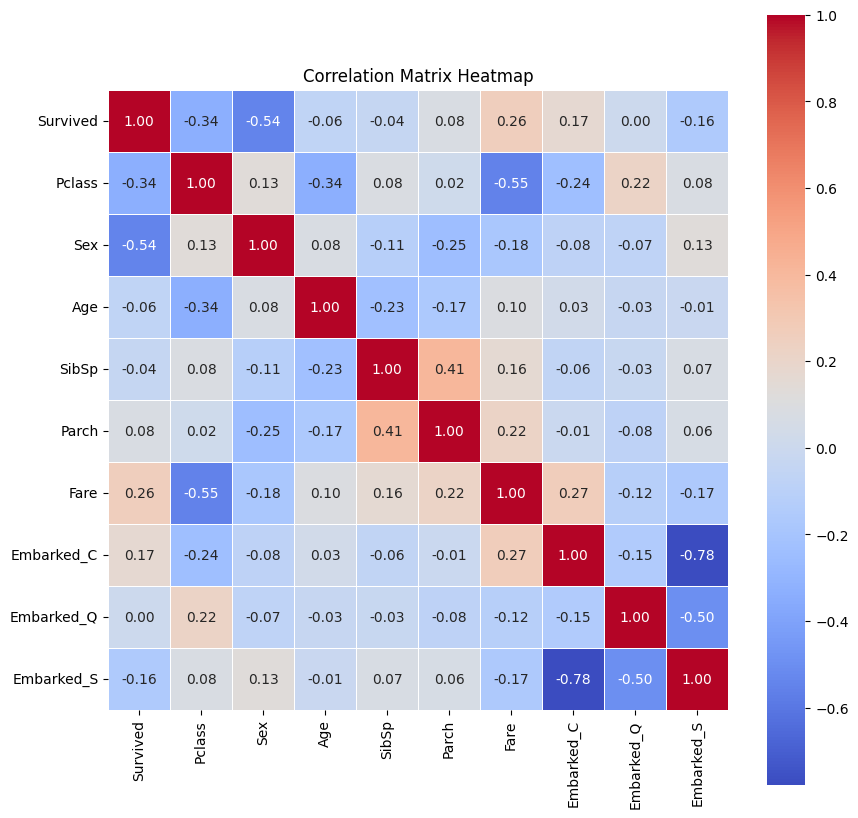

In [20]:
numeric_cols = train_data.select_dtypes(include=[np.number, bool])

# Calculate the correlation matrix
correlation_matrix = numeric_cols.corr()



plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [21]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
X = train_data[features]
y = train_data['Survived']

# Split the data into new training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

# Train your model on the new training data
model = LogisticRegression()
model.fit(X_train, y_train)

# Validate the model on the new validation set
predictions = model.predict(X_val)
accuracy = accuracy_score(y_val, predictions)
print(f"Validation Accuracy: {accuracy}")

Validation Accuracy: 0.8444444444444444


In [22]:
def sigmoid(z):
    # Ensure z is a NumPy array to handle operations correctly
    z = np.array(z)
    return 1 / (1 + np.exp(-z))

def log_likelihood(X, y, theta):
    z = np.dot(X, theta)
    predictions = sigmoid(z)
    ll = np.sum(y * np.log(predictions + 1e-9) + (1 - y) * np.log(1 - predictions + 1e-9))
    return ll

def compute_gradient(X, y, theta):
    z = np.dot(X, theta)
  
    predictions = sigmoid(z)
    gradient = np.dot(X.T, (y - predictions)) # dot product with error 
    return gradient


def gradient_descent(X, y, theta, learning_rate, num_iterations):
    for i in range(num_iterations):
        gradient = compute_gradient(X, y, theta)
        theta += learning_rate * gradient
    return theta

def predict(X, theta):
    z = np.dot(X, theta)
    probabilities = sigmoid(z)
    return probabilities

In [23]:

# Feature names and dummy encoding
feature_names = [
    'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
    'Embarked_C', 'Embarked_Q', 'Embarked_S',
    'AgeGroup_19-30', 'AgeGroup_31-40', 'AgeGroup_41-50', 'AgeGroup_51-60', 'AgeGroup_60+',
    'FareBin_26-50', 'FareBin_51-100', 'FareBin_101-200', 'FareBin_200+'
]

train_data = pd.get_dummies(train_data, columns=['AgeGroup', 'FareBin'], drop_first=True)

# Prepare data
X = train_data[feature_names].values
y = train_data['Survived'].values
X = np.hstack((np.ones((X.shape[0], 1)), X))  # Add intercept
X = np.asarray(X, dtype=np.float64)

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

# Train the model
theta = np.zeros((X_train.shape[1], 1))
learning_rate = 0.9
num_iterations = 8000
theta_final = gradient_descent(X_train, y_train.reshape(-1, 1), theta, learning_rate, num_iterations)

# Predict and validate
probabilities = predict(X_val, theta_final)
predictions = (probabilities > 0.5).astype(int)
accuracy = accuracy_score(y_val, predictions)
print(f"Validation Accuracy: {accuracy}")

/tmp/ipykernel_18/2443542982.py:4: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Validation Accuracy: 0.7777777777777778


In [24]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Validate the model on the new validation set
tree_predictions = tree_model.predict(X_val)
tree_accuracy = accuracy_score(y_val, tree_predictions)
print(f"Decision Tree Validation Accuracy Sk-learn: {tree_accuracy}")

Decision Tree Validation Accuracy Sk-learn: 0.8


In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import numpy as np

# using Linear Regression
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

# Predicting with the linear regression model
lin_predictions = lin_model.predict(X_val)

# Thresholding the predictions to get binary outcome
lin_predictions_binary = np.where(lin_predictions > 0.5, 1, 0)

# Validate the model on the new validation set
lin_accuracy = accuracy_score(y_val, lin_predictions_binary)
print(f"Linear Regression (as classifier) Validation Accuracy: {lin_accuracy}")

Linear Regression (as classifier) Validation Accuracy: 0.8222222222222222


In [26]:
predictions = [0] * 418
submission = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived': predictions
})

submission.to_csv('submission.csv', index=False)